<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

### Mini Batch With Adam

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
file_test = np.genfromtxt("MultipleLR.csv",delimiter=",")
file_test

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [75]:
x = file_test[:,:-1]
y = file_test[:,-1].reshape(-1,1)
x

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [76]:
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [77]:
m = len(x)
X = np.hstack([np.ones((m,1)),x])
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [78]:
X.shape[1]

4

In [79]:
Thetas = np.zeros((X.shape[1],1))
mt = np.zeros((X.shape[1],1))
vt = np.zeros((X.shape[1],1))

In [80]:
def hypothsis(x,theta):
    return x @ theta

In [81]:
def cost_func(theta , x, y, batch_size):
    return (hypothsis(x,theta)-y).T @ (hypothsis(x,theta)-y)/(2*batch_size)   

In [82]:
def gradiant(theta,x,y):
    return x.T @ (hypothsis(x,theta)-y)

In [94]:
batch_size = 5
learning_rate = 0.05
epoche = 400
beta_1 = 0.2
beta_2 = 0.999
epsilon = 1e-8
def gradiant_mini_adam(Thetas , X, y, learning_rate, epoche, beta_1 , beta_2,batch_size,epsilon,mt,vt):
    costs=[]
    Theta = []
    for i in range(epoche):
        for g in range(int(m/batch_size)):
            xi_part = X[g*batch_size: (g+1)*batch_size]
            yi_part = y[g*batch_size: (g+1)*batch_size]
            c = cost_func(Thetas , xi_part, yi_part, batch_size)
            gradiant(Thetas,xi_part,yi_part)
            costs.append(c[0])
            mt = beta_1 * mt + (1-beta_1)*gradiant(Thetas,xi_part,yi_part)
            vt = beta_2 * vt + (1-beta_2)*((gradiant(Thetas,xi_part,yi_part))**2)
            Mt = mt/(1-beta_1**(i+1))
            Vt = vt/(1-beta_2**(i+1))
            Thetas = Thetas - (learning_rate*Mt)/(np.sqrt(Vt) + epsilon)
            Theta.append(Thetas)
            if abs(costs[i]-costs[i-1]) < 1e-3:
                break
    return Theta,costs
theta , cost = gradiant_mini_adam(Thetas , X, y, learning_rate, epoche, beta_1 , beta_2,batch_size,epsilon,mt,vt)
print(theta[-1])
print(cost[-1])

[[0.48055889]
 [0.50549986]
 [0.5582114 ]
 [0.97606659]]
[6.85136164]


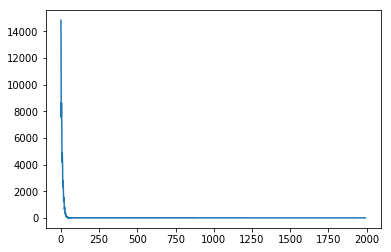

In [97]:
plt.plot(cost)


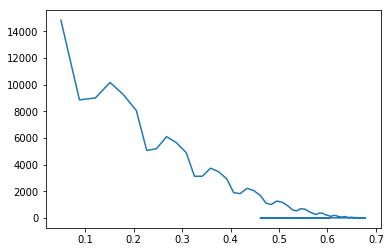

In [ ]:
Theta_zero = [i[0] for i in theta]
plt.plot(Theta_zero,cost)

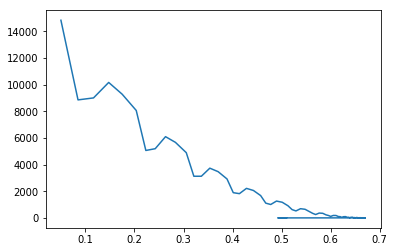

In [ ]:
Theta_one = [i[1] for i in theta]
plt.plot(Theta_one,cost)

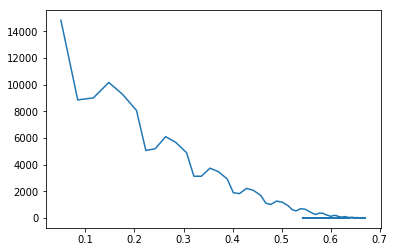

In [ ]:
Theta_two = [i[2] for i in theta]
plt.plot(Theta_two,cost)

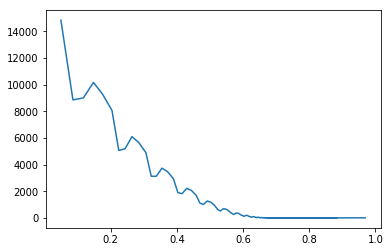

In [ ]:
Theta_three = [i[3] for i in theta]
plt.plot(Theta_three,cost)

In [ ]:
H = hypothsis(X,theta[-1])
H

array([[155.20740894],
       [187.33256375],
       [184.06604672],
       [201.24895278],
       [142.5182285 ],
       [106.5783044 ],
       [151.74524962],
       [113.96754737],
       [176.32383093],
       [165.26464751],
       [145.62741499],
       [144.30546534],
       [189.31553359],
       [156.32800973],
       [152.6641387 ],
       [190.80052036],
       [148.17086665],
       [182.33478564],
       [180.23941072],
       [161.37578489],
       [177.69604977],
       [176.52536122],
       [169.12977669],
       [154.54059147],
       [193.60165949]])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,H)

0.9787994216782351

### Batch With ADAM

In [ ]:
thetas_mv =  np.zeros((4,1))
data = X
labels = y

In [ ]:
def h_test(data,thetas_mv):
    return data@thetas_mv

In [ ]:
def j_mv(thetas_mv , data ,labels):
    return (1/(2*len(x))) * sum((h_test(data,thetas_mv) -labels)**2)

In [ ]:
def gradiant_mv(theta,x,y):
    return x.T @ (h_test(x,theta)-y)

In [85]:
def gradiant_batch_adam(thetas_mv , data, labels, learning_rate, epoche, beta_1 , beta_2,epsilon,mt,vt):
    costs_mv=[]
    Theta_mv = []
    counter = 0 
    costs_mv.append(j_mv(thetas_mv , data, labels))
    Theta_mv.append(thetas_mv)
    for i in range(epoche):
       
        
        mt = beta_1 * mt + (1-beta_1)*gradiant_mv(thetas_mv,data,labels)
        vt = beta_2 * vt + (1-beta_2)*((gradiant_mv(thetas_mv,data,labels))**2)
        Mt = mt/(1-beta_1**(i+1))
        Vt = vt/(1-beta_2**(i+1))
        thetas_mv = thetas_mv - (learning_rate*Mt)/(np.sqrt(Vt) + epsilon)
        Theta_mv.append(thetas_mv)
        counter +=1
        c = j_mv(thetas_mv , data, labels)
        costs_mv.append(c)
        if abs(costs_mv[i]-costs_mv[i-1]) < 1e-3:
            break
            
    return Theta_mv,costs_mv,counter

Theta_mv,costs_mv,counter = gradiant_batch_adam(thetas_mv , data, labels, 0.01, 800, beta_1 , beta_2,epsilon,mt,vt)

costs_mv


[array([13405.98]),
 array([13010.421858]),
 array([12622.73023933]),
 array([12243.45569711]),
 array([11872.73723484]),
 array([11510.53907532]),
 array([11156.76799314]),
 array([10811.31435586]),
 array([10474.0640975]),
 array([10144.90187324]),
 array([9823.7118475]),
 array([9510.37789471]),
 array([9204.78366405]),
 array([8906.81261582]),
 array([8616.34805364]),
 array([8333.27315745]),
 array([8057.47101789]),
 array([7788.82467204]),
 array([7527.21714028]),
 array([7272.53146412]),
 array([7024.65074486]),
 array([6783.45818296]),
 array([6548.83711806]),
 array([6320.67106955]),
 array([6098.84377764]),
 array([5883.23924483]),
 array([5673.74177774]),
 array([5470.23602925]),
 array([5272.60704084]),
 array([5080.74028512]),
 array([4894.52170842]),
 array([4713.83777341]),
 array([4538.5755018]),
 array([4368.62251671]),
 array([4203.86708513]),
 array([4044.19815993]),
 array([3889.50542169]),
 array([3739.67932013]),
 array([3594.61111502]),
 array([3454.19291671]),
 

In [86]:
counter

233

In [ ]:
y_predict = h_test(data,Theta_mv[-1])
y_predict

array([[153.92509012],
       [184.93945236],
       [182.19607793],
       [198.39188407],
       [141.19902684],
       [104.32018044],
       [148.68705303],
       [110.4212774 ],
       [172.92886844],
       [160.28457805],
       [143.2709514 ],
       [141.31733324],
       [188.18733778],
       [156.51846423],
       [149.38051765],
       [187.67798721],
       [149.0853566 ],
       [178.30722666],
       [179.42584917],
       [160.60981458],
       [174.24636033],
       [173.55894521],
       [166.14785231],
       [155.1303251 ],
       [191.62175703]])

In [ ]:
r2_score(y_predict, labels)

0.9782686016909555

In [ ]:
error = y_predict -y

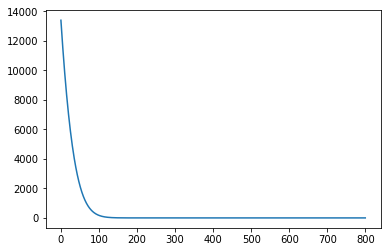

In [ ]:
j = list(range(epoche))
plt.plot(costs_mv)

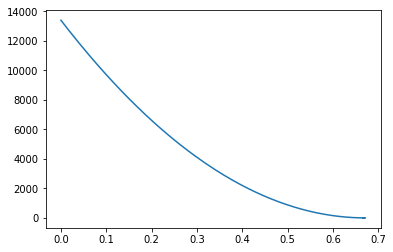

In [ ]:
Theta_zero_mv = [i[0] for i in Theta_mv]
plt.plot(Theta_zero_mv,costs_mv)

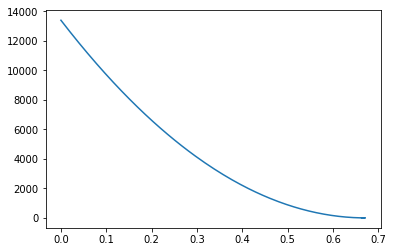

In [ ]:
Theta_one_mv = [i[1] for i in Theta_mv]
plt.plot(Theta_one_mv,costs_mv)

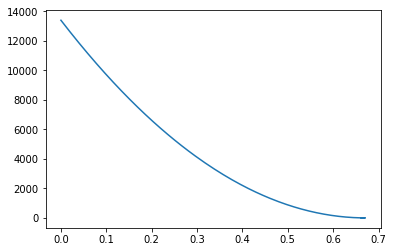

In [ ]:
Theta_two_mv = [i[2] for i in Theta_mv]
plt.plot(Theta_two_mv,costs_mv)

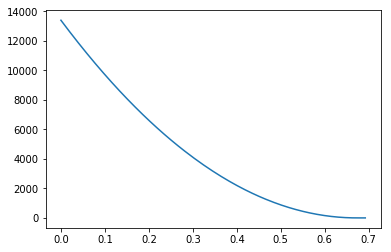

In [ ]:
Theta_three_mv = [i[3] for i in Theta_mv]
plt.plot(Theta_three_mv,costs_mv)